In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv(r"/content/fraudTest.csv")
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [22]:
# generalize dataset (not on basis on any country , name , etc)
data=data.drop(columns=["Unnamed: 0","cc_num","trans_num","unix_time","first","last","merchant"], axis=1)


In [23]:
data["dob"]=pd.to_datetime(data["dob"])
today = pd.to_datetime("today")

data['age_in_days'] = (today - data['dob']).dt.days
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])
data['trans_date_trans_time_days'] = (today - data['trans_date_trans_time']).dt.days



In [24]:
data = data.drop(columns=["city","street"],axis=1)

In [25]:
data = data.drop(columns=["zip","state"],axis=1)

In [26]:
data = data.drop(columns=["dob"],axis=1)

In [27]:
data['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


In [28]:
# encoding binary values
data['gender'] = data['gender'] .apply(
    lambda x: 1 if x == 'F' else 0)

In [29]:
print(data['category'].value_counts())
data['job'].value_counts()


category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64


,count
job,
Film/video editor,4119
Exhibition designer,3968
"Surveyor, land/geomatics",3756
Naval architect,3750
"Designer, ceramics/pottery",3463
...,...
Estate manager/land agent,195
"Engineer, civil (consulting)",194
Operational investment banker,11


In [30]:
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()

# fitting encoder
# ord1.fit([data['category']])
# transforming the column after fitting
data[['category']] = ord1.fit_transform(data[['category']])

data.head(10)

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age_in_days,trans_date_trans_time_days
0,2020-06-21 12:14:25,10.0,2.86,0,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,20907,1820
1,2020-06-21 12:14:33,10.0,29.84,1,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12933,1820
2,2020-06-21 12:14:53,5.0,41.28,1,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,19961,1820
3,2020-06-21 12:15:15,9.0,60.05,0,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,13840,1820
4,2020-06-21 12:15:17,13.0,3.19,0,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,25547,1820
5,2020-06-21 12:15:37,7.0,19.55,1,42.1939,-76.7361,520,Psychotherapist,41.747157,-77.584197,0,12299,1820
6,2020-06-21 12:15:44,5.0,133.93,1,40.5070,-123.9743,1139,"Therapist, occupational",41.499458,-124.888729,0,27180,1820
7,2020-06-21 12:15:50,10.0,10.37,1,43.7557,-97.5936,343,"Development worker, international aid",44.495498,-97.728453,0,19460,1820
8,2020-06-21 12:16:10,12.0,4.37,0,41.0001,-78.2357,3688,Advice worker,41.546067,-78.120238,0,19012,1820
9,2020-06-21 12:16:11,1.0,66.54,1,31.6591,-96.8094,263,Barrister,31.782919,-96.366185,0,25218,1820


In [31]:
ord2 = OrdinalEncoder()

data[['job']] = ord2.fit_transform(data[['job']])
data


,trans_date_trans_time,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age_in_days,trans_date_trans_time_days
0,2020-06-21 12:14:25,10.0,2.86,0,33.9659,-80.9355,333497,275.0,33.986391,-81.200714,0,20907,1820
1,2020-06-21 12:14:33,10.0,29.84,1,40.3207,-110.4360,302,392.0,39.450498,-109.960431,0,12933,1820
2,2020-06-21 12:14:53,5.0,41.28,1,40.6729,-73.5365,34496,259.0,40.495810,-74.196111,0,19961,1820
3,2020-06-21 12:15:15,9.0,60.05,0,28.5697,-80.8191,54767,407.0,28.812398,-80.883061,0,13840,1820
4,2020-06-21 12:15:17,13.0,3.19,0,44.2529,-85.0170,1126,196.0,44.959148,-85.884734,0,25547,1820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,5.0,43.77,0,40.4931,-91.8912,519,460.0,39.946837,-91.333331,0,21672,1626
555715,2020-12-31 23:59:09,7.0,111.84,0,29.0393,-95.4401,28739,198.0,29.661049,-96.186633,0,9302,1626
555716,2020-12-31 23:59:15,7.0,86.88,1,46.1966,-118.9017,3684,294.0,46.658340,-119.715054,0,15904,1626
555717,2020-12-31 23:59:24,13.0,7.99,0,44.6255,-116.4493,129,58.0,44.470525,-117.080888,0,21732,1626


In [32]:
categories = ord1.categories_[0]

# Build mapping to see which values are mapped to which
mapping = {category: i for i, category in enumerate(categories)}
for t, n in mapping.items():
    print(f"{t} → {n}\n")

entertainment → 0

food_dining → 1

gas_transport → 2

grocery_net → 3

grocery_pos → 4

health_fitness → 5

home → 6

kids_pets → 7

misc_net → 8

misc_pos → 9

personal_care → 10

shopping_net → 11

shopping_pos → 12

travel → 13



In [33]:
data.isna().sum()
data.dropna(inplace=True)
data.isna().sum()


,0
trans_date_trans_time,0
category,0
amt,0
gender,0
lat,0
long,0
city_pop,0
job,0
merch_lat,0
merch_long,0


In [34]:
cat2 = ord2.categories_[0]
map2 = {cat:i for i , cat in enumerate(cat2)}
for t, n in map2.items():
    print(f"{t} → {n}\n")

Academic librarian → 0

Accountant, chartered certified → 1

Accountant, chartered public finance → 2

Accounting technician → 3

Acupuncturist → 4

Administrator → 5

Administrator, arts → 6

Administrator, charities/voluntary organisations → 7

Administrator, education → 8

Administrator, local government → 9

Advertising account executive → 10

Advertising account planner → 11

Advertising copywriter → 12

Advice worker → 13

Aeronautical engineer → 14

Agricultural consultant → 15

Aid worker → 16

Air broker → 17

Air cabin crew → 18

Airline pilot → 19

Ambulance person → 20

Amenity horticulturist → 21

Analytical chemist → 22

Animal nutritionist → 23

Animal technologist → 24

Animator → 25

Applications developer → 26

Arboriculturist → 27

Archaeologist → 28

Architect → 29

Architectural technologist → 30

Archivist → 31

Armed forces logistics/support/administrative officer → 32

Armed forces training and education officer → 33

Art gallery manager → 34

Art therapist → 35

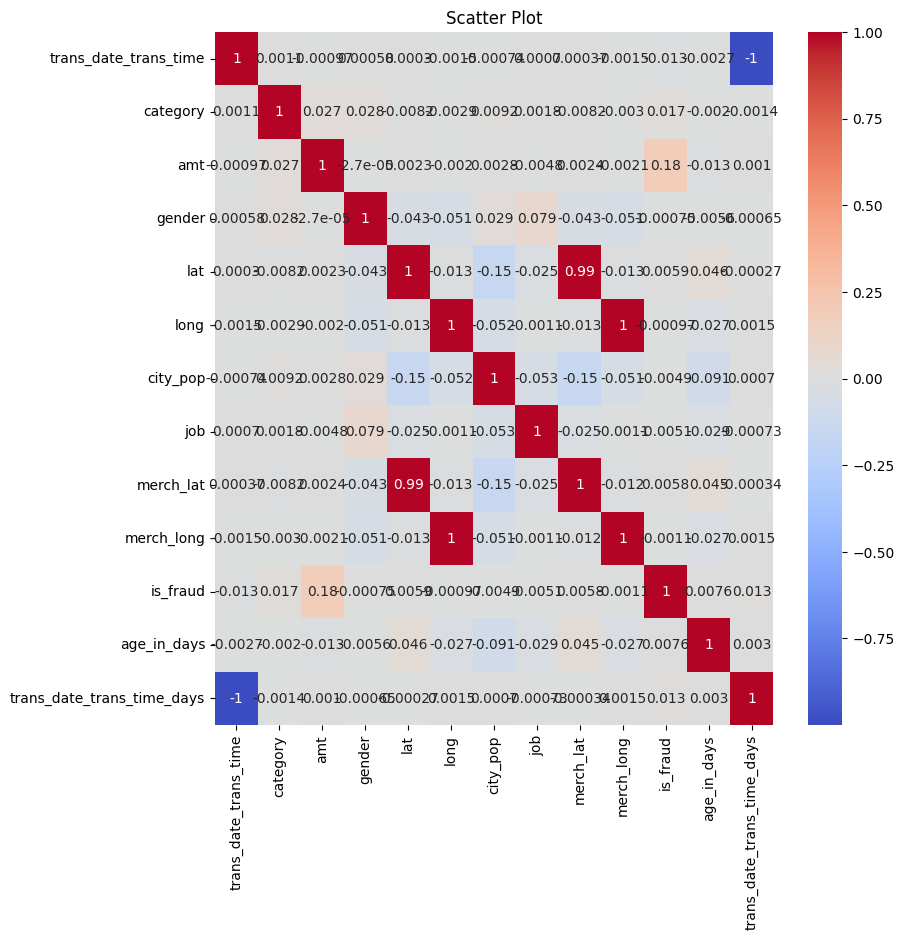

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 9))  # Set larger width and height

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Scatter Plot")
plt.xlabel("")
plt.ylabel("")

# Show the plot
plt.show()

In [36]:
# ro calculate distance between two locations
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply the function row-wise
data['distance_km'] = data.apply(lambda row: haversine(row['merch_lat'], row['merch_long'], row['lat'], row['long']), axis=1)

print(data)


       trans_date_trans_time  category     amt  gender      lat      long  \
0        2020-06-21 12:14:25      10.0    2.86       0  33.9659  -80.9355   
1        2020-06-21 12:14:33      10.0   29.84       1  40.3207 -110.4360   
2        2020-06-21 12:14:53       5.0   41.28       1  40.6729  -73.5365   
3        2020-06-21 12:15:15       9.0   60.05       0  28.5697  -80.8191   
4        2020-06-21 12:15:17      13.0    3.19       0  44.2529  -85.0170   
...                      ...       ...     ...     ...      ...       ...   
555714   2020-12-31 23:59:07       5.0   43.77       0  40.4931  -91.8912   
555715   2020-12-31 23:59:09       7.0  111.84       0  29.0393  -95.4401   
555716   2020-12-31 23:59:15       7.0   86.88       1  46.1966 -118.9017   
555717   2020-12-31 23:59:24      13.0    7.99       0  44.6255 -116.4493   
555718   2020-12-31 23:59:34       0.0   38.13       0  35.6665  -97.4798   

        city_pop    job  merch_lat  merch_long  is_fraud  age_in_days  \
0 

In [37]:
X = data.drop(columns = ["is_fraud","trans_date_trans_time","merch_lat","merch_long","lat","long"],axis = 1)
Y = data['is_fraud']

In [38]:
X

,category,amt,gender,city_pop,job,age_in_days,trans_date_trans_time_days,distance_km
0,10.0,2.86,0,333497,275.0,20907,1820,24.561462
1,10.0,29.84,1,302,392.0,12933,1820,104.925092
2,5.0,41.28,1,34496,259.0,19961,1820,59.080078
3,9.0,60.05,0,54767,407.0,13840,1820,27.698567
4,13.0,3.19,0,1126,196.0,25547,1820,104.335106
...,...,...,...,...,...,...,...,...
555714,5.0,43.77,0,519,460.0,21672,1626,77.026148
555715,7.0,111.84,0,28739,198.0,9302,1626,100.074420
555716,7.0,86.88,1,3684,294.0,15904,1626,80.759302
555717,13.0,7.99,0,129,58.0,21732,1626,52.933240


In [39]:
# pandas for dataframe
# numpy for numbers or array of numbers
X_df = pd.DataFrame(X)  # only if X is a NumPy array
y_series = pd.Series(Y, name='is_fraud')

df = pd.concat([X_df, y_series], axis=1)

df_clean = df.dropna()

X_train = df_clean.drop("is_fraud", axis=1).values
y_train = df_clean["is_fraud"].values
print(df.size)
X_train

5001471


array([[1.00000000e+01, 2.86000000e+00, 0.00000000e+00, ...,
        2.09070000e+04, 1.82000000e+03, 2.45614617e+01],
       [1.00000000e+01, 2.98400000e+01, 1.00000000e+00, ...,
        1.29330000e+04, 1.82000000e+03, 1.04925092e+02],
       [5.00000000e+00, 4.12800000e+01, 1.00000000e+00, ...,
        1.99610000e+04, 1.82000000e+03, 5.90800777e+01],
       ...,
       [7.00000000e+00, 8.68800000e+01, 1.00000000e+00, ...,
        1.59040000e+04, 1.62600000e+03, 8.07593023e+01],
       [1.30000000e+01, 7.99000000e+00, 0.00000000e+00, ...,
        2.17320000e+04, 1.62600000e+03, 5.29332404e+01],
       [0.00000000e+00, 3.81300000e+01, 0.00000000e+00, ...,
        1.17240000e+04, 1.62600000e+03, 7.24382891e+01]])

In [40]:
from sklearn.model_selection import train_test_split
X_train_clean, X_test, y_train_clean, y_test = train_test_split(X_train, y_train, test_size=0.08, random_state=42)
X_train_clean

array([[1.10000000e+01, 2.95000000e+00, 0.00000000e+00, ...,
        1.80540000e+04, 1.73800000e+03, 1.11543220e+02],
       [0.00000000e+00, 1.99400000e+01, 0.00000000e+00, ...,
        2.95440000e+04, 1.66300000e+03, 7.45959790e+01],
       [1.20000000e+01, 9.45000000e+00, 0.00000000e+00, ...,
        9.95100000e+03, 1.66800000e+03, 3.30089257e+01],
       ...,
       [8.00000000e+00, 5.07000000e+00, 1.00000000e+00, ...,
        2.08360000e+04, 1.67800000e+03, 8.97045106e+01],
       [4.00000000e+00, 2.01980000e+02, 1.00000000e+00, ...,
        1.27910000e+04, 1.77400000e+03, 3.72033909e+01],
       [9.00000000e+00, 6.67600000e+01, 0.00000000e+00, ...,
        2.40560000e+04, 1.77700000e+03, 8.37785459e+01]])

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
X_test_clean = X_test[~np.isnan(X_test).any(axis=1)]
y_test_clean = y_test[~np.isnan(X_test).any(axis=1)]
log_reg.fit(X_train_clean, y_train_clean)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
print("Number of NaNs in X_test:", np.isnan(X_train_clean).sum())


Number of NaNs in X_test: 0


no NaNs now otherwise it will give error as model can process NaNs.

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = log_reg.predict(X_test_clean)
cnf_matrix = confusion_matrix(y_test_clean, y_pred)
print('Confusion matrix')
print(cnf_matrix)


Confusion matrix
[[44277     8]
 [  173     0]]


In [44]:
report = classification_report(y_test_clean,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44285
           1       0.00      0.00      0.00       173

    accuracy                           1.00     44458
   macro avg       0.50      0.50      0.50     44458
weighted avg       0.99      1.00      0.99     44458



In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_clean,y_train_clean)

RandomForestClassifier(random_state=42)

In [46]:
y_pred2 = rf.predict(X_test_clean)
cnf = confusion_matrix(y_test_clean,y_pred2)
print(cnf)
print('Report:',classification_report(y_test_clean,y_pred2) )


[[44284     1]
 [   66   107]]
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44285
           1       0.99      0.62      0.76       173

    accuracy                           1.00     44458
   macro avg       0.99      0.81      0.88     44458
weighted avg       1.00      1.00      1.00     44458



Random Forest overfits


In [47]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# needed for cnn networks standard scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_clean)
X_test_scaled = sc.transform(X_test_clean)

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(256, activation="relu"),
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(1, activation="sigmoid")
 ])
# Compile the model for binary classification
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","precision","recall"])

# if val_loss remains same for 5 epochs it stops and reduces computation cost
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',         # What to monitor
    patience=10,                 # Stop after 5 epochs without improvement
    restore_best_weights=True  # Roll back to best weights
)

# fitting the model
history = model.fit(X_train_scaled,
                    y_train_clean,
                    epochs=30,
                    validation_data=(X_test_scaled, y_test_clean),
                    callbacks=[early_stop],
                    verbose=1)

model.evaluate(X_test_scaled, y_test_clean)


Epoch 1/30
15977/15977 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9958 - loss: 0.0195 - precision: 0.2528 - recall: 0.0221 - val_accuracy: 0.9968 - val_loss: 0.0128 - val_precision: 0.6053 - val_recall: 0.5318
Epoch 2/30
15977/15977 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9967 - loss: 0.0124 - precision: 0.7045 - recall: 0.2766 - val_accuracy: 0.9973 - val_loss: 0.0097 - val_precision: 0.8193 - val_recall: 0.3931
Epoch 3/30
15977/15977 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9968 - loss: 0.0105 - precision: 0.6928 - recall: 0.3446 - val_accuracy: 0.9971 - val_loss: 0.0098 - val_precision: 0.7103 - val_recall: 0.4393
Epoch 4/30
15977/15977 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9971 - loss: 0.0099 - precision: 0.7124 - recall: 0.3902 - val_accuracy: 0.9976 - val_loss: 0.0086 - val_precision: 0.7928 - val_recall: 0.5087
Epoch 5/30
15977/15977 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9972 - loss: 0.0091 - precision: 0.7022 - recall: 0.4370 - val_accura

[0.007821260951459408,
 0.9976382255554199,
 0.7931034564971924,
 0.5317919254302979]

[loss,accuracy,precisiion,recall]

In [48]:
model.save("fraud_detection_model_v3.h5")


In [52]:
import numpy as np

# Get predicted probabilities
y_pred_probs = model.predict(X_test_scaled)

# Convert to binary predictions (0 or 1)
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()


1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[3.7966532e-04]
 [2.3937364e-05]
 [3.8048474e-04]
 ...
 [3.1185022e-04]
 [3.5810244e-04]
 [9.4886305e-04]]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test_clean, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_clean, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44285
           1       0.79      0.53      0.64       173

    accuracy                           1.00     44458
   macro avg       0.90      0.77      0.82     44458
weighted avg       1.00      1.00      1.00     44458

Confusion Matrix:
[[44261    24]
 [   81    92]]


In [51]:
# selecting cnn as bits better than other models and confusion matrix is also better